In [410]:
import pandas as pd
import numpy as np
import random
from copy import deepcopy
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score , classification_report

# Loading Training data

In [411]:
olid_train = pd.read_csv("C:/Users/ADWITIYA MANDAL/Desktop/Study Docs/Study documents/Natural Language Processing/Assignment 2/Assignment 2_IntrotoNLP2022_data/Assignment 2_IntrotoNLP2022_data/olid-train.csv")
olid_train

,id,text,labels
0,86426,@USER She should ask a few native Americans wh...,1
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1
2,16820,Amazon is investigating Chinese employees who ...,0
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1
4,43605,@USER @USER Obama wanted liberals &amp; illega...,0
...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,1
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,0
13237,82921,@USER And why report this garbage. We don't g...,1
13238,27429,@USER Pussy,1


# Loading test data

In [412]:
olid_test = pd.read_csv("C:/Users/ADWITIYA MANDAL/Desktop/Study Docs/Study documents/Natural Language Processing/Assignment 2/Assignment 2_IntrotoNLP2022_data/Assignment 2_IntrotoNLP2022_data/olid-test.csv")
olid_test

,id,text,labels
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1
1,27014,"#ConstitutionDay is revered by Conservatives, ...",0
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0
3,13876,#Watching #Boomer getting the news that she is...,0
4,60133,#NoPasaran: Unity demo to oppose the far-right...,1
...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,1
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,0
857,67018,3 people just unfollowed me for talking about ...,1
858,50665,#WednesdayWisdom Antifa calls the right fascis...,0


In [413]:
len_test = len(olid_test["labels"])
print(len_test)

860


## Random Baseline

In [414]:
rand_list = []

for i in range(len_test):
    rand_list.append(random.choice([0,1]))

In [415]:
df = pd.DataFrame({'rand_val':rand_list})
print(df)

     rand_val
0           0
1           0
2           0
3           1
4           1
..        ...
855         0
856         1
857         0
858         1
859         1

[860 rows x 1 columns]


Predicted    0    1
Actual             
0          293  327
1          122  118




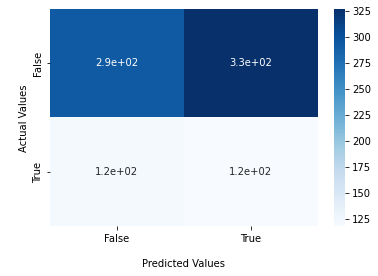

In [416]:
confusion_matrix = pd.crosstab(olid_test['labels'], df['rand_val'], rownames=['Actual'], colnames=['Predicted'])

print(confusion_matrix)
print('\n')
ax = sn.heatmap(confusion_matrix, annot=True, cmap = 'Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [417]:
confusion_matrix

Predicted,0,1
Actual,,
0,293,327
1,122,118


In [418]:
confusion_matrix = np.array(confusion_matrix)
confusion_matrix

array([[293, 327],
       [122, 118]], dtype=int64)

In [419]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

print("True positives:",TP)
print("True negatives:",TN)
print("False positives:",FP)
print("False Negatives:",FN)

True positives: 118
True negatives: 293
False positives: 327
False Negatives: 122


In [420]:
matrix_rand = classification_report(olid_test['labels'], df['rand_val'],labels = [0,1])
print('Classification report: \n', matrix_rand)

Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       620
           1       0.27      0.49      0.34       240

    accuracy                           0.48       860
   macro avg       0.49      0.48      0.46       860
weighted avg       0.58      0.48      0.50       860



## Majority Baseline

In [421]:
max_label = olid_train['labels'].value_counts().idxmax()

majority_list = [max_label] * len_test
majority_list = pd.DataFrame({'majority_val' : majority_list})

In [422]:
print("The label with the maximum occurances in the training set: " , max_label)

The label with the maximum occurances in the training set:  0


In [423]:
olid_train['labels'].value_counts()

0    8840
1    4400
Name: labels, dtype: int64

Predicted    0
Actual        
0          620
1          240




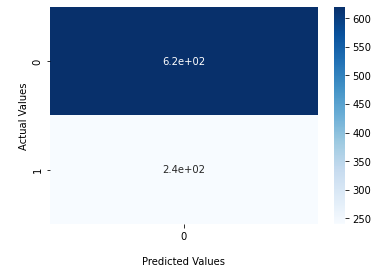

In [424]:
#Majority Baseline Performance

confusion_matrix_maj = pd.crosstab(olid_test['labels'], majority_list['majority_val'] ,rownames=['Actual'], colnames=['Predicted'])

print(confusion_matrix_maj)
print('\n')
ax = sn.heatmap(confusion_matrix_maj, annot=True, cmap = 'Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values')

plt.show()

In [425]:
# Modifying the array by inserting empty values in the Predicted 1 grid

confusion_matrix_maj = np.array(confusion_matrix_maj)
confusion_matrix_maj = np.insert(confusion_matrix_maj,1,np.array((0,0)),1)
confusion_matrix_maj

array([[620,   0],
       [240,   0]], dtype=int64)

In [426]:
TN = confusion_matrix_maj[0][0]
TP = confusion_matrix_maj[1][1]
FP = confusion_matrix_maj[0][1]
FN = confusion_matrix_maj[1][0]

print("True positives:",TP)
print("True negatives:",TN)
print("False positives:",FP)
print("False Negatives:",FN)

True positives: 0
True negatives: 620
False positives: 0
False Negatives: 240


In [427]:
matrix_maj = classification_report(olid_test['labels'], majority_list['majority_val'] ,labels = [0,1])
print('Classification report: \n', matrix_maj)

Classification report: 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       620
           1       0.00      0.00      0.00       240

    accuracy                           0.72       860
   macro avg       0.36      0.50      0.42       860
weighted avg       0.52      0.72      0.60       860



C:\Users\ADWITIYA MANDAL\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADWITIYA MANDAL\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADWITIYA MANDAL\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m